### LangGraph
##### it is a library for building stateful, multi-actor applications with LLMs, used to create agents and multi-agent workflow.
#### LangGraph powerts production grade agents.
##### it provides fine-grained control over both the flow and state of your agent applications.
##### it implements a central persistence layer, embedding features taht are common to the most agebt architectures.


In [3]:
## Simple Graph using LangGraph

In [ ]:
## Build a simple workflow or Graph using LangGraph
## State
## Node
## Edges

In [ ]:
## State

In [2]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

In [ ]:
## Nodes

In [3]:
def start_play(state:State):
    print("Start_play node has been called")
    return {"graph_info":state['graph_info']+ "I am going to play"}


def cricket(state:State):
    print("My cricket node has been called")
    return {"graph_info": state['graph_info']+ "cricket"}

def badminton(state:State):
    print("My cricket node has been called")
    return {"graph_info": state['graph_info']+ "badminton"}

In [ ]:
## Putting conditions with nodes

In [7]:
import random
from typing import Literal

def random_play(state:State)-> Literal['Cricket', 'Badminton']:
    graph_info = state['graph_info']
    if random.random()>0.5:
        return "Cricket"
    else:
        return "Badminton"

In [ ]:
## Graph Construction

In [8]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

## build graph
graph = StateGraph(State)

## Adding the nodes

graph.add_node("Start_play", start_play)
graph.add_node("Cricket", cricket)
graph.add_node("Badminton", badminton)


## Schedule the flow of the graph

graph.add_edge(START, "Start_play")
graph.add_conditional_edges("Start_play", random_play)
graph.add_edge("Cricket", END)
graph.add_edge("Badminton", END)



In [9]:
## Compile the graph
graph_builder = graph.compile()




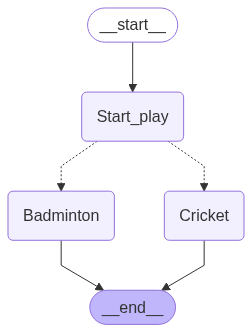

In [10]:
## View the graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [ ]:
## Graph Invocation

In [20]:
graph_builder.invoke({"graph_info":"Hey, my name is Balmukund"})

Start_play node has been called
My cricket node has been called


{'graph_info': 'Hey, my name is BalmukundI am going to playbadminton'}